# Give me tools!

![react](react.png)


In [36]:
# Setup
from dotenv import load_dotenv
from langchain import PromptTemplate, LLMChain
from langchain.prompts import (
    ChatPromptTemplate,
    PromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

from langchain.chat_models import ChatOpenAI
from langchain.schema import AIMessage, HumanMessage, SystemMessage
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

from langchain.agents import Tool
from langchain.memory import ConversationBufferMemory
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from getpass import getpass


load_dotenv()

gpt35 = ChatOpenAI(
    temperature=0, callbacks=[StreamingStdOutCallbackHandler()], streaming=True
)

In [40]:
# Example of an agent

from langchain.utilities.wolfram_alpha import WolframAlphaAPIWrapper
from langchain.utilities import PythonREPL


wolfram = WolframAlphaAPIWrapper()
python_repl = PythonREPL()

tools = [
    Tool(
        name="Wolfram Alpha",
        func=wolfram.run,
        description="Wolfram Alpha is a computational knowledge engine that answers factual queries directly by computing the answer from externally sourced curated data, rather than providing a list of documents or web pages that might contain the answer as a search engine might.",
    ),
    Tool(
        name="python_repl",
        description="A Python shell. Use this to execute python commands. Input should be a valid python command. If you want to see the output of a value, you should print it out with `print(...)`.",
        func=python_repl.run,
    ),
]

memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

agent_chain = initialize_agent(
    tools,
    gpt35,
    agent=AgentType.CHAT_CONVERSATIONAL_REACT_DESCRIPTION,
    verbose=True,
    memory=memory,
)

agent_chain.prompt

agent_chain.run("When was the last total solar eclipse?")

AttributeError: 'AgentExecutor' object has no attribute 'prompt'

In [38]:
agent_chain.run("How old was Leonardo DiCaprio on that day?")



> Entering new AgentExecutor chain...
```json
{
    "action": "Wolfram Alpha",
    "action_input": "Leonardo DiCaprio age on December 4, 2021"
}
``````json
{
    "action": "Wolfram Alpha",
    "action_input": "Leonardo DiCaprio age on December 4, 2021"
}
```
Observation: Assumption: age | of Leonardo DiCaprio (actor) | on Saturday, December 4, 2021 
Answer: 47 years 22 days
Thought:```json
{
    "action": "Final Answer",
    "action_input": "Leonardo DiCaprio was 47 years and 22 days old on December 4, 2021."
}
``````json
{
    "action": "Final Answer",
    "action_input": "Leonardo DiCaprio was 47 years and 22 days old on December 4, 2021."
}
```

> Finished chain.


'Leonardo DiCaprio was 47 years and 22 days old on December 4, 2021.'



> Entering new AgentExecutor chain...
Question: What is the current population of the Slovakia and Czechia? Plot the two numbers.
Thought: I can use Wolfram Alpha to get the population data and Python to plot the numbers.
Action:
```
{
  "action": "Wolfram Alpha",
  "action_input": "population Slovakia and Czechia"
}
```
Question: What is the current population of the Slovakia and Czechia? Plot the two numbers.
Thought: I can use Wolfram Alpha to get the population data and Python to plot the numbers.
Action:
```
{
  "action": "Wolfram Alpha",
  "action_input": "population Slovakia and Czechia"
}
```

Observation: Assumption: Slovakia
Czech Republic | population 
Answer: Slovakia | 5.46 million people
Czech Republic | 10.5 million people
(2021 estimates)
Thought:I can use Python to plot the population data obtained from Wolfram Alpha.
Action:
```
{
  "action": "python_repl",
  "action_input": "import matplotlib.pyplot as plt\n\nplt.plot([5.46, 10.5], marker='o')\nplt.xticks([0, 1], [

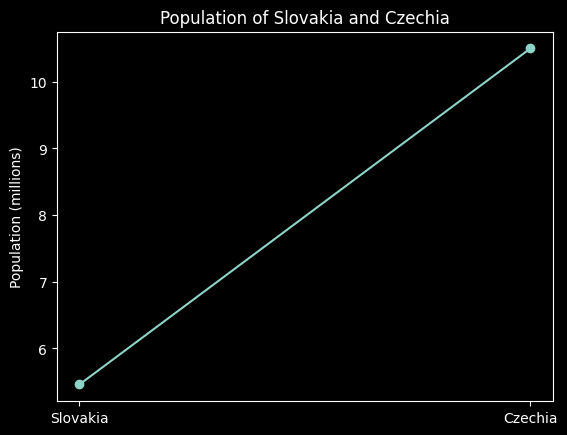


Observation: 
Thought:I have successfully plotted the population data for Slovakia and Czechia.
Final Answer: The current population of Slovakia is 5.46 million people and the current population of Czechia is 10.5 million people.I have successfully plotted the population data for Slovakia and Czechia.
Final Answer: The current population of Slovakia is 5.46 million people and the current population of Czechia is 10.5 million people.

> Finished chain.


'The current population of Slovakia is 5.46 million people and the current population of Czechia is 10.5 million people.'

In [39]:
gpt4 = ChatOpenAI(
    model="gpt-4",
    temperature=0,
    callbacks=[StreamingStdOutCallbackHandler()],
    streaming=True,
)

agent_chain = initialize_agent(
    tools,
    gpt35,
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    # memory=memory,
)

agent_chain.run(
    "What is the current population of the Slovakia and Czechia? Plot the two numbers."
)